In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week 1

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.figure(figsize=(10, 6))
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14, labels=label)
  plt.grid(True)
  plt.show()

In [3]:
def trend(time, slope=0):
  """describes the general tendency of the values to go up or down as time progresses"""
  return time * slope

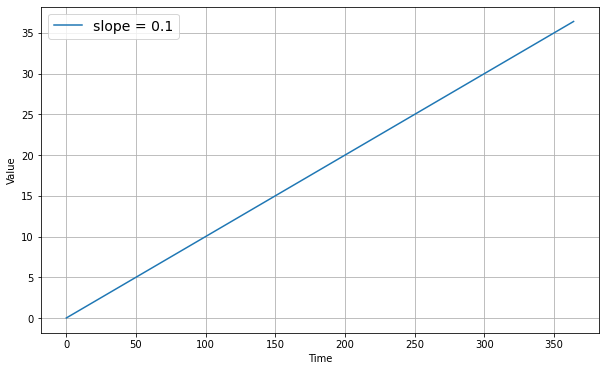

In [4]:
time = np.arange(365)
slope = 0.1
series = trend(time, slope)
plot_series(time, series, label=[f"slope = {slope}"])

In [5]:
def seasonal_pattern(season_time):
  data_pattern = np.where(season_time<0.4,
                          np.cos(season_time * 2 * np.pi),
                          1 / np.exp(3 * season_time))
  return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase) % period) / period
  data_pattern = amplitude * seasonal_pattern(season_time)
  return data_pattern

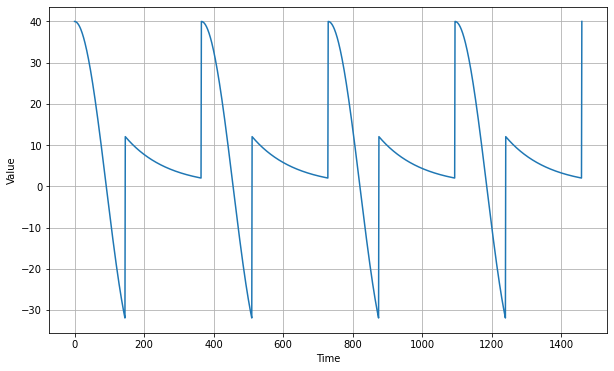

In [6]:
time = np.arange(4 * 365 + 1)
period = 365
amplitude = 40

series = seasonality(time, period, amplitude)
plot_series(time, series)

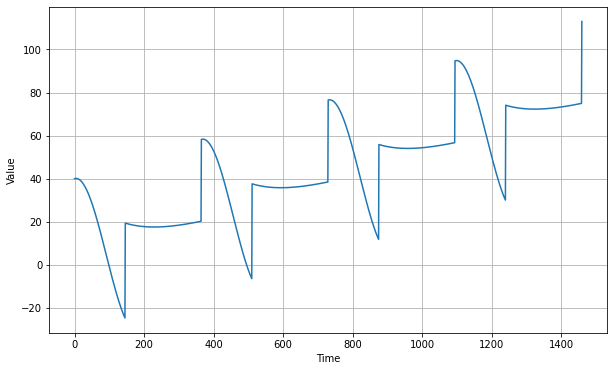

In [7]:
slope = 0.05
period = 365
amplitude= 40

series = trend(time, slope) + seasonality(time, period, amplitude)
plot_series(time, series)

In [8]:
def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  noise = rnd.randn(len(time)) * noise_level
  return noise

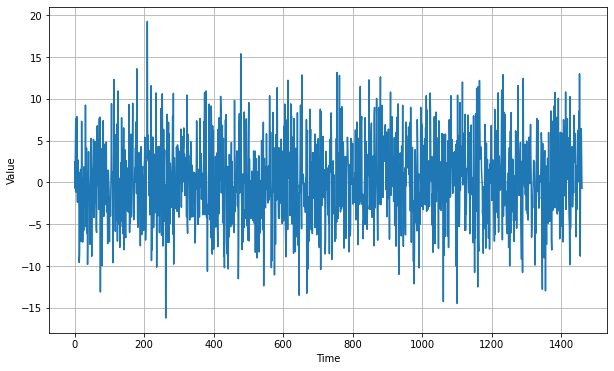

In [9]:
noise_level = 5

noise_signal = noise(time, noise_level, seed=42)
plot_series(time, noise_signal)

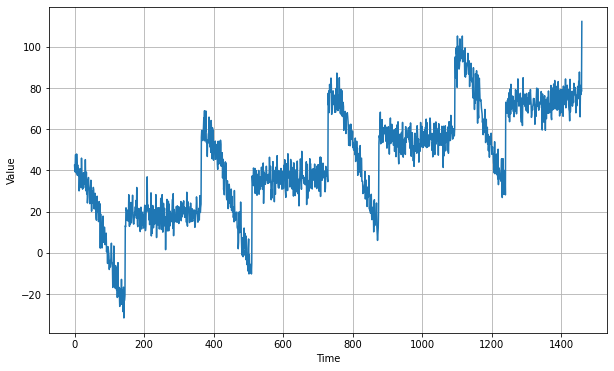

In [10]:
series += noise_signal

plot_series(time, series)

In [11]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  arr = rnd.randn(len(time) + 50)
  arr[:50] = 100
  phi1 = 0.5
  phi2 = -0.1

  for step in range(50, len(time)+50):
    arr[step] += phi1 * arr[step - 50]
    arr[step] += phi2 * arr[step - 33]

  arr = arr[50:] * amplitude

  return arr

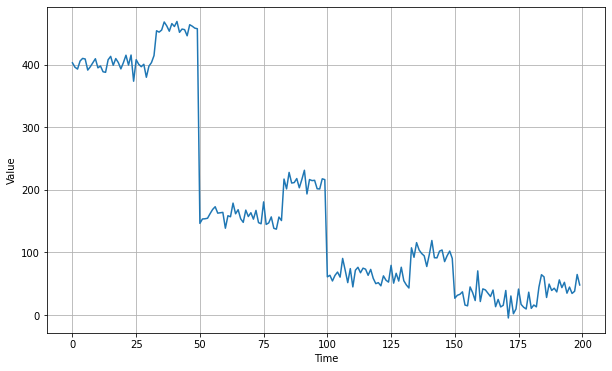

In [12]:
series = autocorrelation(time, amplitude=10, seed=42)
plot_series(time[:200], series[:200])

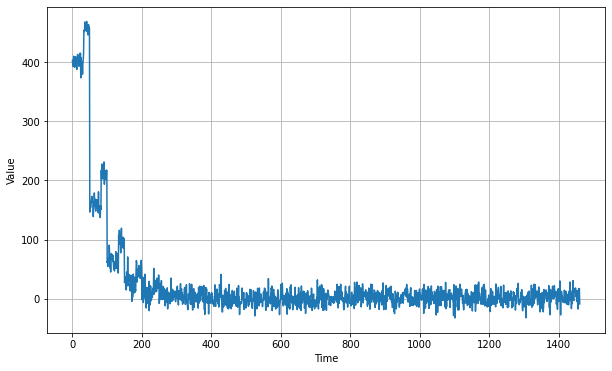

In [13]:
plot_series(time, series)

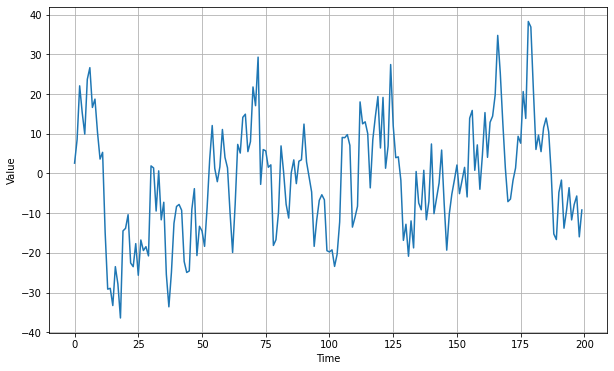

In [14]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

In [15]:
def impulses(time, num_impulses, amplitude=1, seed=None):
  rnd = np.random.RandomState(42)
  impulse_indices = rnd.randint(len(time), size=num_impulses)
  series = np.zeros(len(time))
  for idx in impulse_indices:
    series[idx] += rnd.randn() * amplitude
  return series

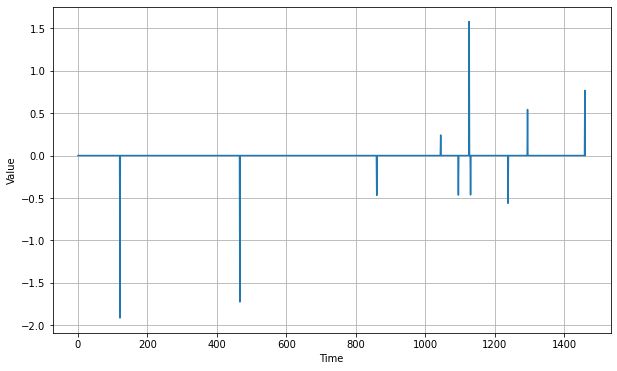

In [16]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [17]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

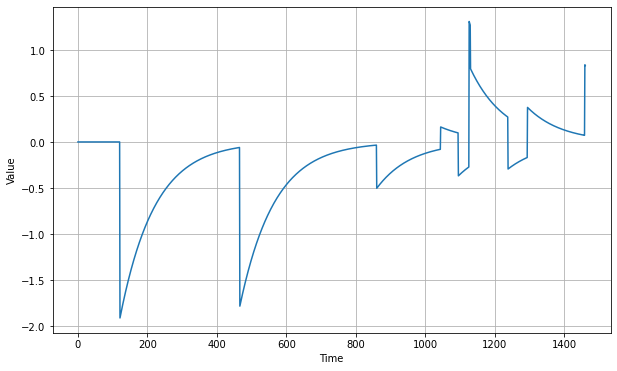

In [18]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

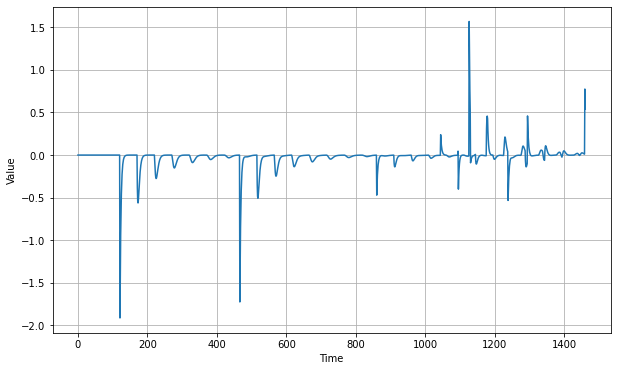

In [19]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

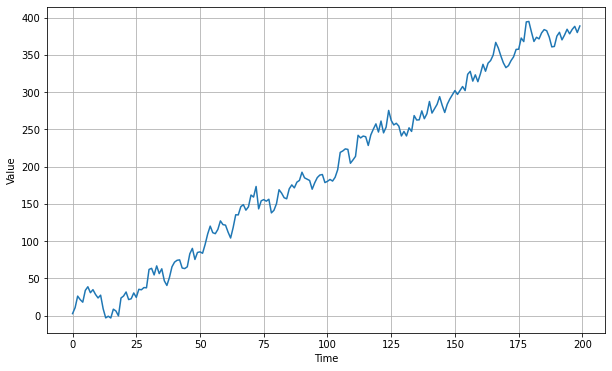

In [20]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

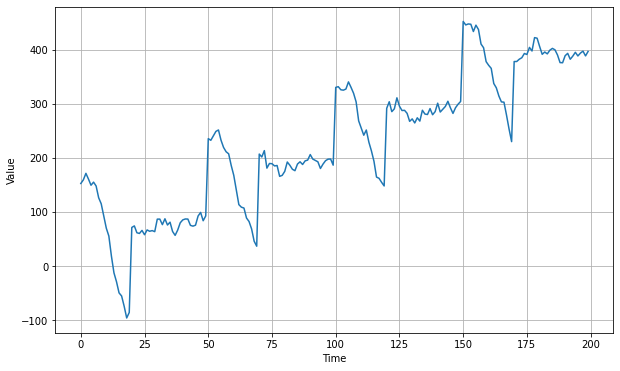

In [21]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


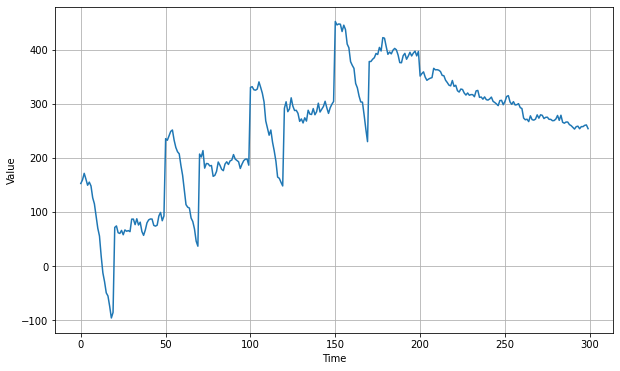

In [41]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

In [23]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Naive Forecast

In [24]:
split_time=1000

In [25]:
time_train=time[:split_time]
x_train=series[:split_time]

time_valid = time[split_time:]
x_valid=series[split_time:]

In [26]:
naive_forecast = series[split_time-1:-1]

time_step = 100

print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 100: -557.5007397227896
prediction at time step 101: -557.5007397227896


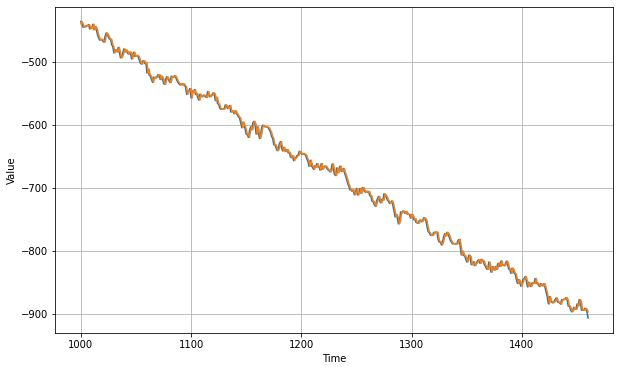

In [27]:
plot_series(time_valid, (x_valid, naive_forecast))

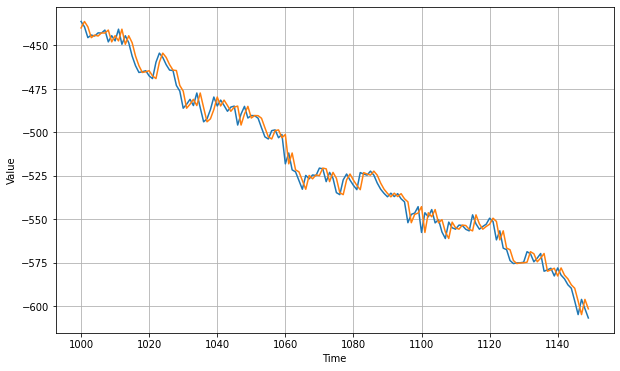

In [28]:
# zoom in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [29]:
import tensorflow as tf
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

29.251293007010872
4.368655930211442


## Moving Average

In [30]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time: time+window_size].mean())

  return np.array(forecast)

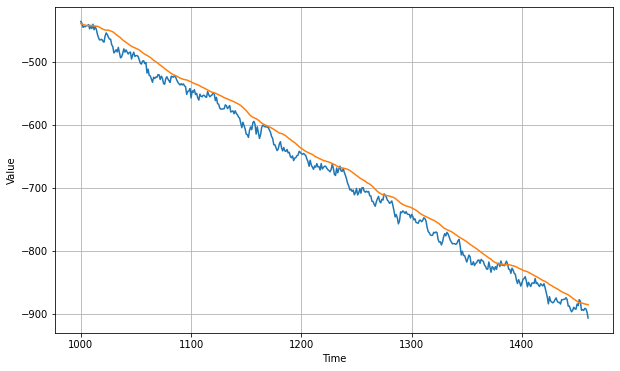

In [31]:
moving_avg = moving_average_forecast(series, 30)[split_time-30:]

plot_series(time_valid, (x_valid, moving_avg))

In [32]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())
# moving average -> does not anticipate trend or seasonality

297.9053314291649
15.16324686736776


## Differencing

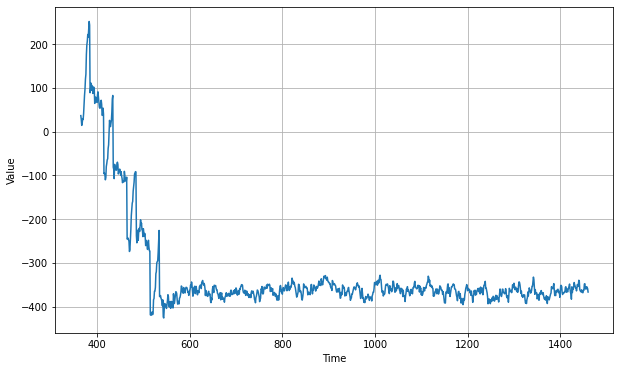

In [33]:
diff_series = series[365:] - series[:-365]
diff_time = time[365:]

plot_series(diff_time, diff_series)

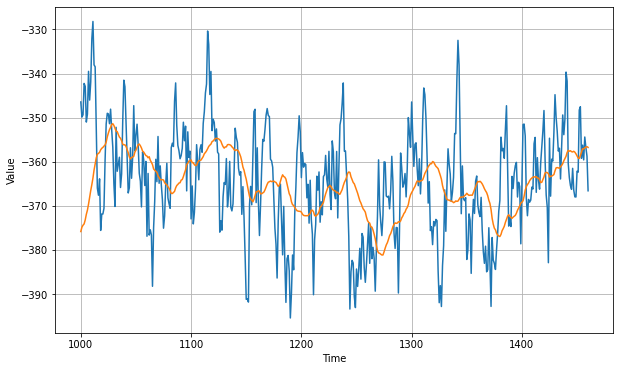

In [34]:
diff_moving_avg = moving_average_forecast(diff_series, 30)
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]
diff_series = diff_series[split_time - 365:]

plot_series(time_valid, (diff_series, diff_moving_avg))

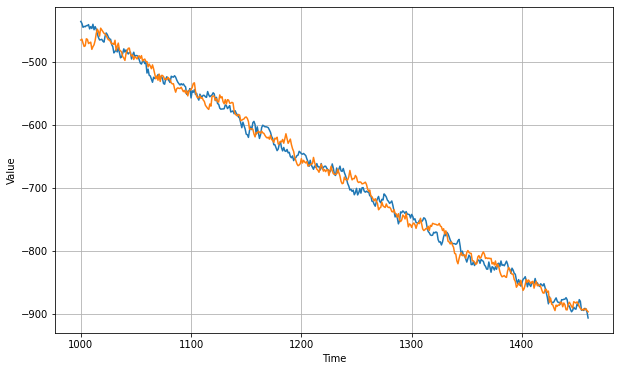

In [35]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [36]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

153.6383765723954
9.875258579444166


## Smoothing

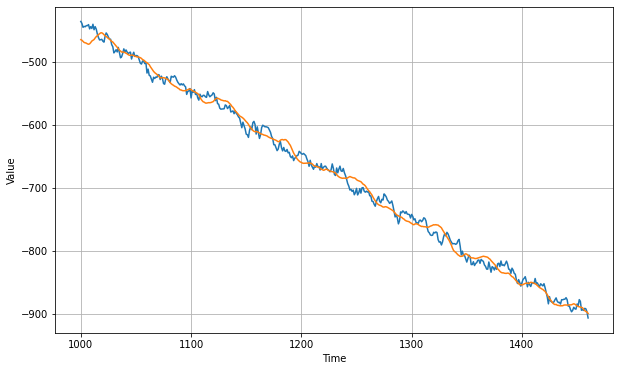

In [47]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [38]:
 # Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

116.7347668945654
8.798898956674913


# Week 2

In [62]:
dataset = tf.data.Dataset.range(10)

for v in dataset:
  print(v.numpy())

0
1
2
3
4
5
6
7
8
9


In [63]:
dataset = dataset.window(size=5, shift=1)

for w in dataset:
  print(w)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [64]:
for w in dataset:
  print([i.numpy() for i in w])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


In [54]:
dataset = tf.data.Dataset.range(10)

dataset = dataset.window(size=5, shift=1, drop_remainder=True)

for w in dataset:
  print([i.numpy() for i in w])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [65]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size=5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))

for w in dataset:
  print(w)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [66]:
for w in dataset:
  print(w.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [67]:
for w in dataset:
  print([i.numpy() for i in w])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [73]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size=5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda w: w.batch(5))
dataset = dataset.map(lambda w: (w[:-1], w[-1]))

for x, y in dataset:
  print("x: ", x)
  print("y: ", y)
  print("\n")

x:  tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
y:  tf.Tensor(4, shape=(), dtype=int64)


x:  tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)
y:  tf.Tensor(5, shape=(), dtype=int64)


x:  tf.Tensor([2 3 4 5], shape=(4,), dtype=int64)
y:  tf.Tensor(6, shape=(), dtype=int64)


x:  tf.Tensor([3 4 5 6], shape=(4,), dtype=int64)
y:  tf.Tensor(7, shape=(), dtype=int64)


x:  tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
y:  tf.Tensor(8, shape=(), dtype=int64)


x:  tf.Tensor([5 6 7 8], shape=(4,), dtype=int64)
y:  tf.Tensor(9, shape=(), dtype=int64)




In [74]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size=5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda w: w.batch(5))
dataset = dataset.map(lambda w: (w[:-1], w[-1]))
dataset = dataset.shuffle(buffer_size=10)

for x, y in dataset:
  print("x: ", x)
  print("y: ", y)
  print("\n")

x:  tf.Tensor([2 3 4 5], shape=(4,), dtype=int64)
y:  tf.Tensor(6, shape=(), dtype=int64)


x:  tf.Tensor([5 6 7 8], shape=(4,), dtype=int64)
y:  tf.Tensor(9, shape=(), dtype=int64)


x:  tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)
y:  tf.Tensor(5, shape=(), dtype=int64)


x:  tf.Tensor([3 4 5 6], shape=(4,), dtype=int64)
y:  tf.Tensor(7, shape=(), dtype=int64)


x:  tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
y:  tf.Tensor(4, shape=(), dtype=int64)


x:  tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
y:  tf.Tensor(8, shape=(), dtype=int64)




In [80]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size=5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda w: w.batch(5))
dataset = dataset.map(lambda w: (w[:-1], w[-1]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)

for x, y in dataset:
  print("x: ", x)
  print("y: ", y)
  print()

x:  tf.Tensor(
[[0 1 2 3]
 [2 3 4 5]], shape=(2, 4), dtype=int64)
y:  tf.Tensor([4 6], shape=(2,), dtype=int64)

x:  tf.Tensor(
[[3 4 5 6]
 [5 6 7 8]], shape=(2, 4), dtype=int64)
y:  tf.Tensor([7 9], shape=(2,), dtype=int64)

x:  tf.Tensor(
[[4 5 6 7]
 [1 2 3 4]], shape=(2, 4), dtype=int64)
y:  tf.Tensor([8 5], shape=(2,), dtype=int64)



In [82]:
import numpy as np
import matploplib.plyplot as plt
import tensorflow as tf

ModuleNotFoundError: ignored

In [83]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

In [103]:
time = np.arange(4*365+1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

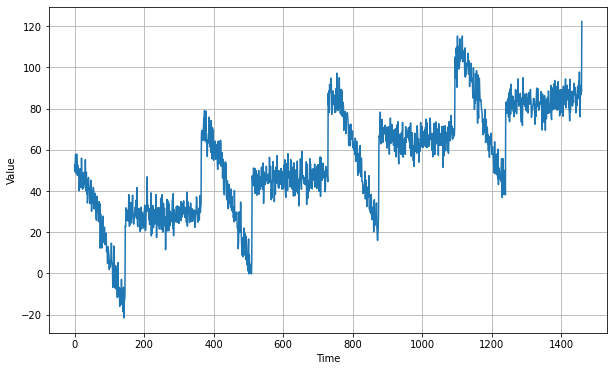

In [104]:
series = baseline + seasonality(time, period=365, amplitude=amplitude) + noise(time, noise_level, seed=42) + trend(time, slope)

plot_series(time, series)

In [105]:
split_time = 1000

time_train = time[:split_time]
time_valid = time[split_time:]

x_train = series[:split_time]
x_valid = series[split_time:]

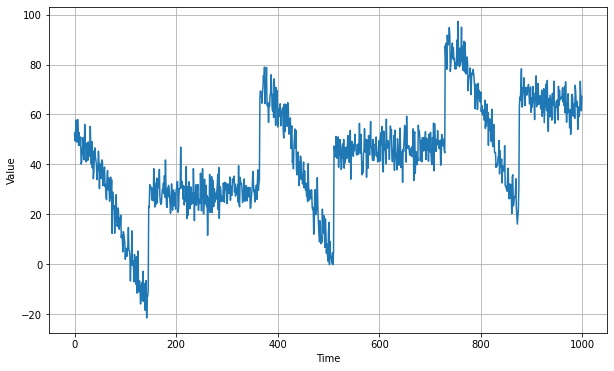

In [106]:
plot_series(time_train, x_train)

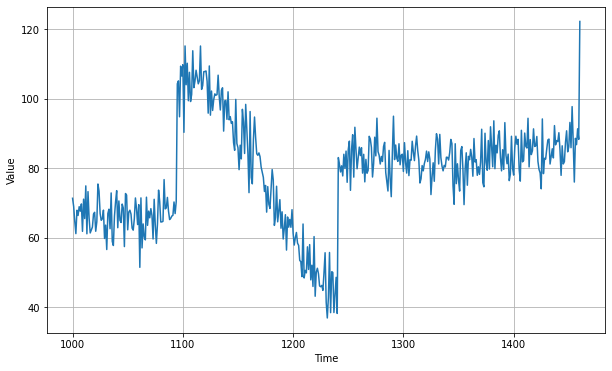

In [107]:
plot_series(time_valid, x_valid)

In [108]:
window_size=20
batch_size=32
shuffle_buffer_size=1000

In [109]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(size=window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda w: w.batch(window_size+1))
  dataset = dataset.map(lambda w: (w[:-1], w[-1]))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [110]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [111]:
for w in dataset.take(1):
  print("Type: ", type(w))
  print("# of elements: ", len(w))
  print("Shape of first element: ", w[0].shape)
  print("Shape of second element: ", w[1].shape)

Type:  <class 'tuple'>
# of elements:  2
Shape of first element:  (32, 20)
Shape of second element:  (32,)


In [117]:
# build model
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.Sequential([l0])

print("Layer weights: ", l0.get_weights())

model.summary()

Layer weights:  [array([[ 0.29443926],
       [-0.01026809],
       [-0.40581983],
       [ 0.4563887 ],
       [-0.19525975],
       [-0.0108425 ],
       [-0.11838865],
       [ 0.47535187],
       [ 0.35499686],
       [ 0.23686463],
       [ 0.19124651],
       [-0.06408527],
       [ 0.29859632],
       [ 0.19936585],
       [ 0.3787787 ],
       [ 0.3950616 ],
       [-0.01939994],
       [-0.19853714],
       [-0.31083846],
       [ 0.47459072]], dtype=float32), array([0.], dtype=float32)]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), loss="mse")
model.fit(dataset, epochs=200)

Epoch 1/200
31/31 [==============================] - 0s 2ms/step - loss: 923.0389
Epoch 2/200
31/31 [==============================] - 0s 1ms/step - loss: 166.7749
Epoch 3/200
31/31 [==============================] - 0s 1ms/step - loss: 121.1190
Epoch 4/200
31/31 [==============================] - 0s 1ms/step - loss: 113.1275
Epoch 5/200
31/31 [==============================] - 0s 1ms/step - loss: 106.6349
Epoch 6/200
31/31 [==============================] - 0s 1ms/step - loss: 99.8996
Epoch 7/200
31/31 [==============================] - 0s 1ms/step - loss: 94.7794
Epoch 8/200
31/31 [==============================] - 0s 1ms/step - loss: 92.5409
Epoch 9/200
31/31 [==============================] - 0s 1ms/step - loss: 87.9256
Epoch 10/200
31/31 [==============================] - 0s 1ms/step - loss: 83.7138
Epoch 11/200
31/31 [==============================] - 0s 2ms/step - loss: 80.8619
Epoch 12/200
31/31 [==============================] - 0s 1ms/step - loss: 78.9380
Epoch 13/200
31/31 [

In [119]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
model prediction: [[43.807068]]


In [121]:
model.predict(series[50:70][np.newaxis])

array([[29.447554]], dtype=float32)

length of the forecast list: 461
shape of the validation set: (461,)
shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


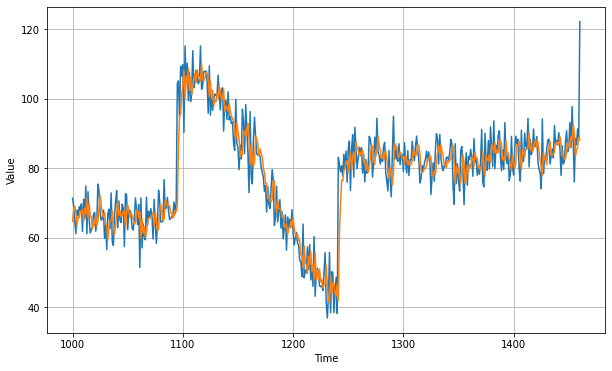

In [122]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [123]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

44.690674
4.9604154


length of the forecast list: 461
shape of the validation set: (461,)
shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


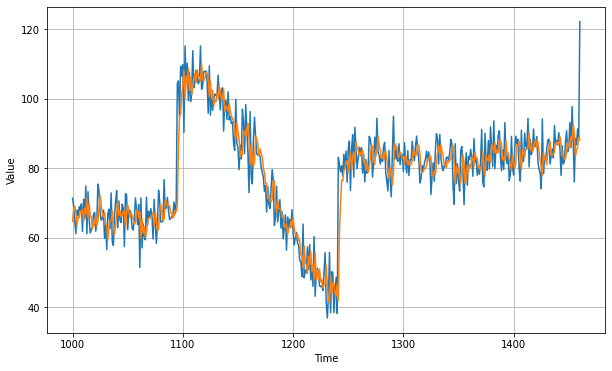

In [125]:
forecast = []

# Initialize a list
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results)) 

### DNN with Time Series Data

In [126]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

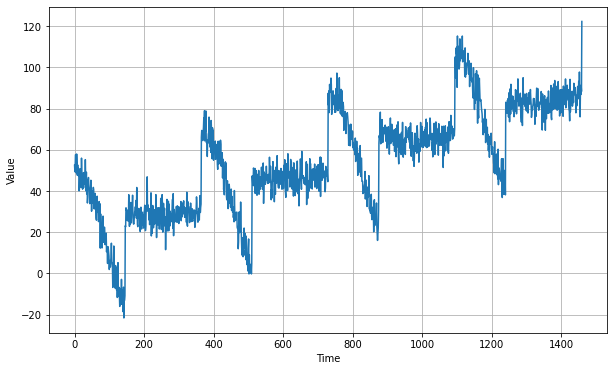

In [127]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [128]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [129]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [130]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [131]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [132]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [134]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 335.5623
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 105.4655
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 93.3470
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 87.6512
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 83.4891
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 80.9375
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 78.0516
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 75.5884
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 73.7895
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 72.2685
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 71.9195
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 70.0257
Epoch 13/100
31/31 [===

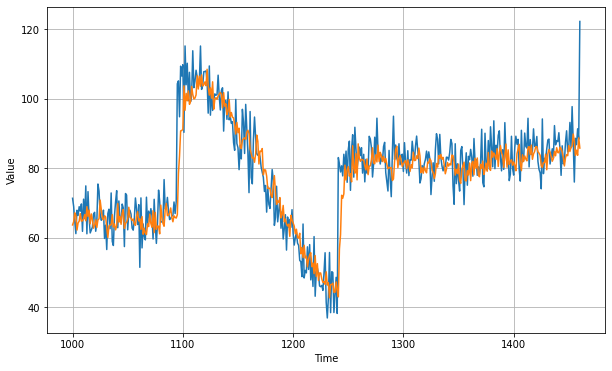

In [135]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [136]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

47.749084
5.0097947


In [137]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [138]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [139]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [140]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 4452.2300 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 3514.7620 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 2721.4504 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 2090.9783 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 1479.4078 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 899.4146 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 489.1331 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 275.7746 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 178.8161 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 135.7663 - lr: 2.8184e-08
Epoc

(1e-08, 0.001, 0.0, 300.0)

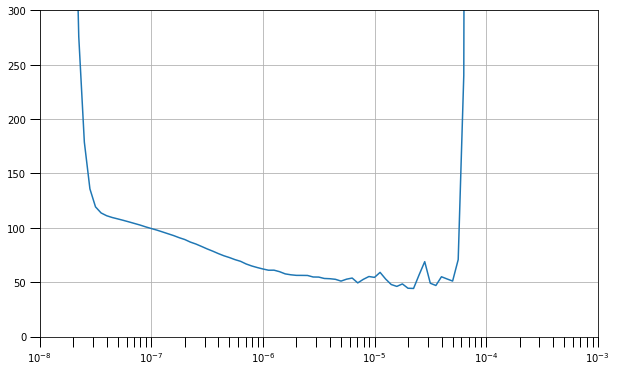

In [141]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])